# Uncertainty analysis of parameter-specific multiplier factors
Sensitivity analysis based on the assumed linear regression model for the evolution of EF with single parameters
Datasets of EF evolution with increments of values of a parameter.

1. Estimate the slope of EF vs. parameter (example with speed, v) using linear regression:
EF(v)=a⋅v+b
where: EF(v) = emission factor; a = slope (increase in EF per km/h); b = intercept

2. Convert to a multiplier factor (f_p) for the parameter p:
multiplier factor (f_p) for a 10 km/h increase: f_p+delta = EF(v+delta)/EF(v)
​Using the regression equation:(slope(v+delta)+intercept)/(slope(v)+intercept)

3. Sensitivity analysis
Comparison of fp - EF couples considering the lower bound case, mean, and upper bound case.

When several datasets are available from different studies: a regression model is calculated for each datasets (even though the same trend is observed, conducted tests and measurement units may be different and not directly comparable), then the mean fp is computed across all datasets.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Speed parameter for Large particles (> 10 µm)

### 1. Estimate the slope

In [7]:
# A single dataset available for large particles from Yan et al. (2021)
# Speed (km/h) and corresponding EF (mg/km) data
speed_Large = np.array([34, 57, 80])
EF_v_Large = np.array([0.0433, 0.1041, 0.0948])

# Estimate the linear regression (EF = a*v + b)
slope_v_Large, intercept_v_Large, r_value_v_Large, p_value_v_Large, std_err_v_Large = stats.linregress(speed_Large, EF_v_Large)

# Compute estimated EF values and uncertainty in slope
EF_estimated_v_Large = slope_v_Large * speed_Large + intercept_v_Large
t_score_v_Large = stats.t.ppf(0.975, df=len(speed_Large)-1)  # 95% CI for small sample (1 dataset of three datapoints)
slope_CI_v_Large = t_score_v_Large * std_err_v_Large  # Confidence interval for slope

print(f"Estimated EF_v_Large formula: EF_Large(v) = {slope_v_Large:.4f} * v + {intercept_v_Large:.4f}")
print(f"95% Confidence Interval for slope: [{slope_v_Large - slope_CI_v_Large:.4f}, {slope_v_Large + slope_CI_v_Large:.4f}]")
print(f"r_value_v_Large: [{r_value_v_Large}]")
print(f"p_value_v_Large: [{p_value_v_Large}]")
print(f"std_err_v_Large: [{std_err_v_Large}]")


Estimated EF_v_Large formula: EF_Large(v) = 0.0011 * v + 0.0169
95% Confidence Interval for slope: [-0.0027, 0.0049]
r_value_v_Large: [0.7862592365405731]
p_value_v_Large: [0.4240300811616685]
std_err_v_Large: [0.0008798316058737558]


### EF vs. Speed regression

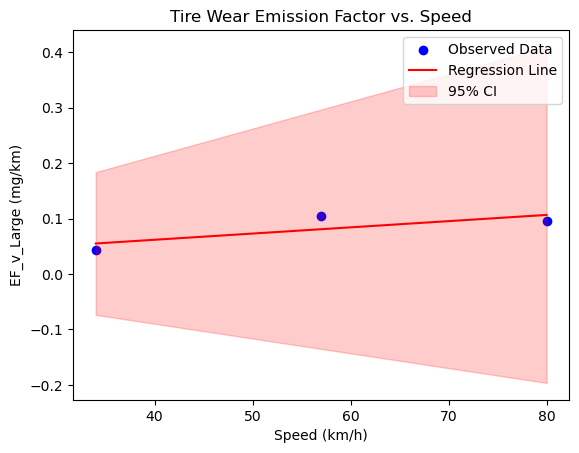

In [11]:
# Plot data and regression line for EF_Large
plt.scatter(speed_Large, EF_v_Large, label="Observed Data", color="blue")
plt.plot(speed_Large, EF_estimated_v_Large, label="Regression Line", color="red")
plt.fill_between(speed, 
                 (slope_v_Large - slope_CI_v_Large) * speed_Large + intercept_v_Large, 
                 (slope_v_Large + slope_CI_v_Large) * speed_Large + intercept_v_Large, 
                 color='red', alpha=0.2, label="95% CI")
plt.xlabel("Speed (km/h)")
plt.ylabel("EF_v_Large (mg/km)")
plt.title("Tire Wear Emission Factor vs. Speed")
plt.legend()
plt.show()

### 2. Convert to multiplier factor (fp)

Multiplier factor for urban +10 km/h: 1.154
95% Confidence Interval: [1.072, 1.235]

Multiplier factor for urban +30 km/h: 1.461
95% Confidence Interval: [1.379, 1.542]

Multiplier factor for urban +50 km/h: 1.768
95% Confidence Interval: [1.687, 1.849]



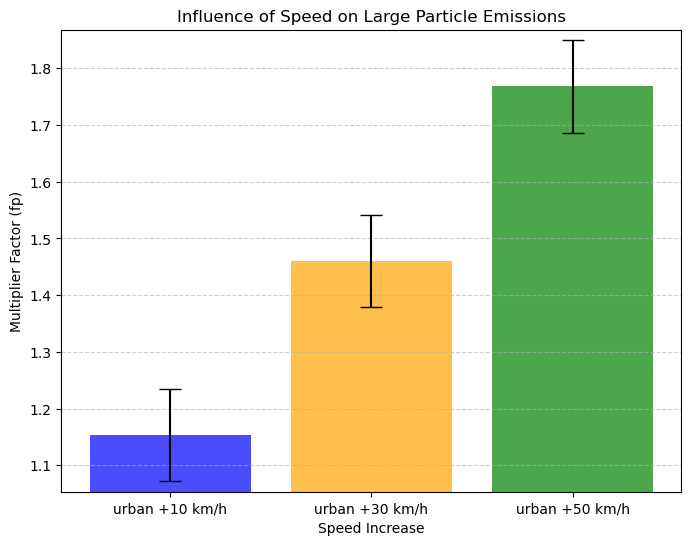

In [9]:
# Computing multiplier factors for several speed increments relevant to average speeds in urban, intercity and highway scenarii
# Defining speed increments
speed_increments = {
    "urban +10": 10,  # Urban increase (+10 km/h)
    "urban +30": 30,  # Intercity driving (+30 km/h)
    "urban +50": 50,  # Highway driving (+50 km/h)
}

# Store results
fp_results_v_Large = {}

# Loop over speed increments and compute fp
for label, increment in speed_increments.items():
    v_new = 50 + increment  # New speed based on urban baseline (50 km/h)

    # Compute multiplier factor (fp)
    fp_mean_v_Large = (slope_v_Large * v_new + intercept_v_Large) / (slope_v_Large * 50 + intercept_v_Large)

    # Compute t-score for confidence interval
    n = len(speed_Large)  # Number of data points
    t_score_v_Large = stats.t.ppf(0.975, df=n-1) if n > 1 else 1  # Avoid division by zero if n=1

    # Compute standard deviation (uncertainty)
    fp_std_v_Large = np.std(EF_v_Large, ddof=1)
    fp_CI_v_Large = t_score_v_Large * (fp_std_v_Large / np.sqrt(n)) if n > 1 else 0  # Confidence interval margin

    # Store results
    fp_results_v_Large[label] = {
        "mean": fp_mean_v_Large,
        "low": fp_mean_v_Large - fp_CI_v_Large,
        "high": fp_mean_v_Large + fp_CI_v_Large
    }

# Print results
for label, values in fp_results_v_Large.items():
    print(f"Multiplier factor for {label} km/h: {values['mean']:.3f}")
    print(f"95% Confidence Interval: [{values['low']:.3f}, {values['high']:.3f}]\n")

# Visualization: Bar Chart with Error Bars
labels = [label + " km/h" for label in fp_results_v_Large.keys()]
means = [fp_results_v_Large[label]["mean"] for label in fp_results_v_Large.keys()]
errors = [fp_results_v_Large[label]["high"] - fp_results_v_Large[label]["mean"] for label in fp_results_v_Large.keys()]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=errors, capsize=8, color=["blue", "orange", "green"], alpha=0.7)
plt.xlabel("Speed Increase")
plt.ylabel("Multiplier Factor (fp)")
plt.title("Influence of Speed on Large Particle Emissions")
plt.ylim(min(means) - 0.1, max(means) + 0.1)  # Adjust y-axis for visibility
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


## Speed parameter for PM (< 10 µm)

### EF_PM vs. Speed regression

NameError: name 'linregress' is not defined

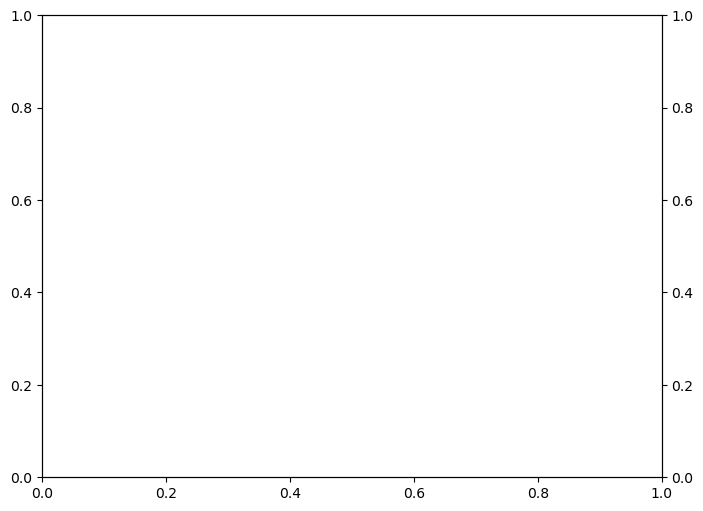

In [13]:
# Define datasets
datasets_v_PM = {
    "Kim & Lee (2018)": {"speed_PM": [50, 80, 110, 140], "EF_v_PM": [13, 15, 22, 22]},
    "Kwak et al. (2013)": {"speed_PM": [50, 80, 110, 140], "EF_v_PM": [20.57, 31.66, 33.63, 37.3]},
    "Yan et al. (2021)": {"speed_PM": [34, 57, 80], "EF_v_PM": [566, 1650, 1360]},
    #"Woo et al. (2022)": {"speed_PM": [50, 80, 110, 140], "EF_v_PM": [323.8, 491.3, 890.8, 1321.3]},
}

# Separate datasets into two groups based on magnitude
datasets_v_PM_low = ["Kim & Lee (2018)", "Kwak et al. (2013)"]
datasets_v_PM_high = ["Yan et al. (2021)", "Woo et al. (2022)"]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()  # Create secondary y-axis

# Define colors for datasets
colors = {
    "Kim & Lee (2018)": "blue",
    "Kwak et al. (2013)": "green",
    "Yan et al. (2021)": "red",
    #"Woo et al. (2022)": "orange"
}

# Plot data and linear regressions for low magnitude datasets
for study in datasets_v_PM_low:
    speed = np.array(datasets_v_PM[study]["speed_PM"])
    EF = np.array(datasets_v_PM[study]["EF_v_PM"])

    # Compute linear regression
    slope, intercept, _, _, _ = linregress(speed, EF)
    EF_estimated = slope * speed + intercept

    # Plot
    ax1.scatter(speed, EF, label=f"{study} (Observed)", color=colors[study])
    ax1.plot(speed, EF_estimated, linestyle="dashed", color=colors[study], label=f"{study} (Regression)")

ax1.set_xlabel("Speed (km/h)")
ax1.set_ylabel("EF (mg/km) - Low magnitude", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot data and linear regressions for high magnitude datasets
for study in datasets_v_PM_high:
    speed = np.array(datasets_v_PM[study]["speed_PM"])
    EF = np.array(datasets_v_PM[study]["EF_v_PM"])

    # Compute linear regression
    slope, intercept, _, _, _ = linregress(speed, EF)
    EF_estimated = slope * speed + intercept

    # Plot
    ax2.scatter(speed, EF, label=f"{study} (Observed)", color=colors[study])
    ax2.plot(speed, EF_estimated, linestyle="dashed", color=colors[study], label=f"{study} (Regression)")

ax2.set_ylabel("EF (mg/km) - High magnitude", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("EF vs. Speed for Different Studies")
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))
plt.grid(True)
plt.show()

### 2. Convert to multiplier factor (fp)

Multiplier factor for urban +10 km/h: 1.108
95% Confidence Interval: [0.993, 1.223]

Multiplier factor for urban +30 km/h: 1.325
95% Confidence Interval: [0.980, 1.669]

Multiplier factor for urban +50 km/h: 1.541
95% Confidence Interval: [0.967, 2.115]



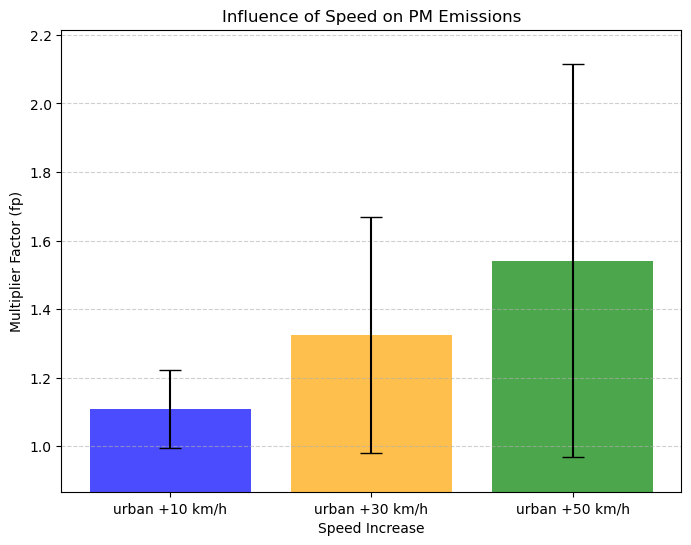

In [15]:
# Defining speed increments for urban, intercity, highway cases
speed_increments = {
    "urban +10": 10,  # Urban increase (+10 km/h)
    "urban +30": 30,  # Intercity driving (+30 km/h)
    "urban +50": 50,  # Highway driving (+50 km/h)
}

v_base = 50  # Base urban speed

# Store results
fp_results_v_PM = {key: [] for key in speed_increments.keys()}

# Compute regression & multiplier factors for each dataset
for study, data in datasets_v_PM.items():
    speed_PM = np.array(data["speed_PM"])
    EF_v_PM = np.array(data["EF_v_PM"])
    
    # Perform linear regression
    slope_v_PM, intercept_v_PM, r_value_v_PM, p_value_v_PM, std_err_v_PM = stats.linregress(speed_PM, EF_v_PM)
    
    # Loop over different speed increments
    for label, increment in speed_increments.items():
        v_new = v_base + increment  # New speed
        EF_base_PM = slope_v_PM * v_base + intercept_v_PM
        EF_new_PM = slope_v_PM * v_new + intercept_v_PM

        # Compute multiplier factor (fp) for this dataset and store it
        fp_v_PM = EF_new_PM / EF_base_PM
        fp_results_v_PM[label].append(fp_v_PM)

# Compute mean multiplier factor and confidence interval per speed increment
fp_summary_v_PM = {}

for label, fp_list_v_PM in fp_results_v_PM.items():
    fp_mean_v_PM = np.mean(fp_list_v_PM)  # Mean fp across studies
    fp_std_v_PM = np.std(fp_list_v_PM, ddof=1)  # Sample standard deviation
    n = len(fp_list_v_PM)  # Number of datasets
    t_score_v_PM = stats.t.ppf(0.975, df=n-1) if n > 1 else 1  # Avoid div-by-zero for n=1
    fp_CI_v_PM = t_score_v_PM * (fp_std_v_PM / np.sqrt(n)) if n > 1 else 0  # Confidence interval margin

    # Store mean and CI
    fp_summary_v_PM[label] = {
        "mean": fp_mean_v_PM,
        "low": fp_mean_v_PM - fp_CI_v_PM,
        "high": fp_mean_v_PM + fp_CI_v_PM,
        "error": fp_CI_v_PM,  # For error bars in visualization
    }

# Print results
for label, values in fp_summary_v_PM.items():
    print(f"Multiplier factor for {label} km/h: {values['mean']:.3f}")
    print(f"95% Confidence Interval: [{values['low']:.3f}, {values['high']:.3f}]\n")

# Visualization: Bar Chart with Error Bars
labels = [label + " km/h" for label in fp_summary_v_PM.keys()]
means = [fp_summary_v_PM[label]["mean"] for label in fp_summary_v_PM.keys()]
errors = [fp_summary_v_PM[label]["error"] for label in fp_summary_v_PM.keys()]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=errors, capsize=8, color=["blue", "orange", "green"], alpha=0.7)
plt.xlabel("Speed Increase")
plt.ylabel("Multiplier Factor (fp)")
plt.title("Influence of Speed on PM Emissions")
plt.ylim(min([val["low"] for val in fp_summary_v_PM.values()]) - 0.1, 
         max([val["high"] for val in fp_summary_v_PM.values()]) + 0.1)  # Adjust y-axis
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [51]:
# Print individual fp values for each dataset
for label, fp_list in fp_results_PM.items():
    print(f"\nSpeed Increase: {label.replace('plus', '+')} km/h")
    for i, study in enumerate(datasets.keys()):
        print(f"  {study}: fp = {fp_list[i]:.3f}")



Speed Increase: +10 km/h
  Kim & Lee (2018): fp = 1.088
  Kwak et al. (2013): fp = 1.076
  Yan et al. (2021): fp = 1.161
  Woo et al. (2022): fp = 1.456

Speed Increase: intercity km/h
  Kim & Lee (2018): fp = 1.264
  Kwak et al. (2013): fp = 1.227
  Yan et al. (2021): fp = 1.483
  Woo et al. (2022): fp = 2.368

Speed Increase: highway km/h
  Kim & Lee (2018): fp = 1.439
  Kwak et al. (2013): fp = 1.379
  Yan et al. (2021): fp = 1.806
  Woo et al. (2022): fp = 3.280


### 3. Sensitivity analysis

In [19]:
# Sensitivity analysis: influence of the fp value on the adjusted EF
# Baseline EF in mg/km (assumed, replace with actual value)
EF_base_Large = 80  # Baseline emission factor for a passenger car in urban driving conditions, in mg/km
EF_base_PM = 7    # Baseline for Fine particles (PM), in mg/km

# Define multiplier factors and their confidence intervals for Large particles
parameters = [
    {"name": "Speed +10 km/h", "fp_v_Large": 1.154, "CI_v_Large": (1.072, 1.235),
     "fp_v_PM": 1.108, "CI_v_PM": (0.993, 1.223)},
]

# Create table with sensitivity analysis results
table_data = []
for param in parameters:
    # Large particles
    fp_mean_v_Large = param["fp_v_Large"]
    fp_lower_v_Large, fp_upper_v_Large = param["CI_v_Large"]
    EF_lower_v_Large = round(fp_lower_v_Large * EF_base_Large, 2)
    EF_mean_v_Large = round(fp_mean_v_Large * EF_base_Large, 2)
    EF_upper_v_Large = round(fp_upper_v_Large * EF_base_Large, 2)

    # Fine particles (PM)
    fp_mean_v_PM = param["fp_v_PM"]
    fp_lower_v_PM, fp_upper_v_PM = param["CI_v_PM"]
    EF_lower_v_PM = round(fp_lower_v_PM * EF_base_PM, 2)
    EF_mean_v_PM = round(fp_mean_v_PM * EF_base_PM, 2)
    EF_upper_v_PM = round(fp_upper_v_PM * EF_base_PM, 2)

    # Append row to the table
    table_data.append([param["name"], 
                       fp_lower_v_Large, fp_mean_v_Large, fp_upper_v_Large, EF_lower_v_Large, EF_mean_v_Large, EF_upper_v_Large,
                       fp_lower_v_PM, fp_mean_v_PM, fp_upper_v_PM, EF_lower_v_PM, EF_mean_v_PM, EF_upper_v_PM])

# Convert to DataFrame for display
df = pd.DataFrame(table_data, columns=[
    "Parameter", 
    "fp_v_Large (Lower)", "fp_v_Large (Mean)", "fp_v_Large (Upper)", 
    "Adjusted EF_v_Large (Lower)", "Adjusted EF_v_Large (Mean)", "Adjusted EF_v_Large (Upper)",
    "fp_v_PM (Lower)", "fp_v_PM (Mean)", "fp_v_PM (Upper)", 
    "Adjusted EF_v_PM (Lower)", "Adjusted EF_v_PM (Mean)", "Adjusted EF_v_PM (Upper)"
])

# Sort table by mean fp for Large particles (you can change to PM if needed)
df = df.sort_values(by="fp_v_Large (Mean)", ascending=False)

# Display the table
print(df.to_string(index=False))

# Save to CSV for further analysis
df.to_csv("sensitivity_Speed_fp.csv", index=False)


     Parameter  fp_v_Large (Lower)  fp_v_Large (Mean)  fp_v_Large (Upper)  Adjusted EF_v_Large (Lower)  Adjusted EF_v_Large (Mean)  Adjusted EF_v_Large (Upper)  fp_v_PM (Lower)  fp_v_PM (Mean)  fp_v_PM (Upper)  Adjusted EF_v_PM (Lower)  Adjusted EF_v_PM (Mean)  Adjusted EF_v_PM (Upper)
Speed +10 km/h               1.072              1.154               1.235                        85.76                       92.32                         98.8            0.993           1.108            1.223                      6.95                     7.76                      8.56


## Ambient temperature parameter for Large particles (> 10 µm) and PM (< 10 µm)

### 1. Estimate the slope

In [21]:
# A single dataset available for Large particles and PM from Yan et al. (2021)
# Temperature (T) and corresponding EF (mg/km) data:
temperature = np.array([25, 45, 65])
EF_T_Large = np.array([0.104, 0.107, 0.116])
EF_T_PM = np.array([1850, 475, 283])

# Estimate the linear regression (EF = a*T + b) for Large particles and PM
slope_T_Large, intercept_T_Large, r_value_T_Large, p_value_T_Large, std_err_T_Large = stats.linregress(temperature, EF_T_Large)
slope_T_PM, intercept_T_PM, r_value_T_PM, p_value_T_PM, std_err_T_PM = stats.linregress(temperature, EF_T_PM)

# Compute estimated EF values and uncertainty in each slope
## Large particles
EF_estimated_T_Large = slope_T_Large * temperature + intercept_T_Large
t_score_T_Large = stats.t.ppf(0.9, df=len(temperature)-1)  # 80% CI for small sample (1 dataset of three data points)
slope_CI_T_Large = t_score_T_Large * std_err_T_Large  # Confidence interval for slope

## PM
EF_estimated_T_PM = slope_T_PM * temperature + intercept_T_PM
t_score_T_PM = stats.t.ppf(0.9, df=len(temperature)-1)  # 80% CI for small sample (1 dataset of three data points)
slope_CI_T_PM = t_score_T_PM * std_err_T_PM  # Confidence interval for slope

# Print results
print(f"Estimated EF_T_Large formula: EF_Large(T) = {slope_T_Large:.4f} * T + {intercept_T_Large:.4f}")
print(f"80% Confidence Interval for slope: [{slope_T_Large - slope_CI_T_Large:.4f}, {slope_T_Large + slope_CI_T_Large:.4f}]")
print(f"r_value_T_Large: [{r_value_T_Large}]")
print(f"p_value_T_Large: [{p_value_T_Large}]")
print(f"std_err_T_Large: [{std_err_T_Large}]")

print(f"Estimated EF_T_PM formula: EF_PM(T) = {slope_T_PM:.4f} * T + {intercept_T_PM:.4f}")
print(f"80% Confidence Interval for slope: [{slope_T_PM - slope_CI_T_PM:.4f}, {slope_T_PM + slope_CI_T_PM:.4f}]")
print(f"r_value_T_PM: [{r_value_T_PM}]")
print(f"p_value_T_PM: [{p_value_T_PM}]")
print(f"std_err_T_PM: [{std_err_T_PM}]")

Estimated EF_T_Large formula: EF_Large(T) = 0.0003 * T + 0.0955
80% Confidence Interval for slope: [0.0001, 0.0005]
r_value_T_Large: [0.9607689228305228]
p_value_T_Large: [0.1789123750220667]
std_err_T_Large: [8.660254037844392e-05]
Estimated EF_T_PM formula: EF_PM(T) = -39.1750 * T + 2632.2083
80% Confidence Interval for slope: [-71.3722, -6.9778]
r_value_T_PM: [-0.9167058031206987]
p_value_T_PM: [0.26167614357966396]
std_err_T_PM: [17.07513421128317]


### EF vs. Temperature regression

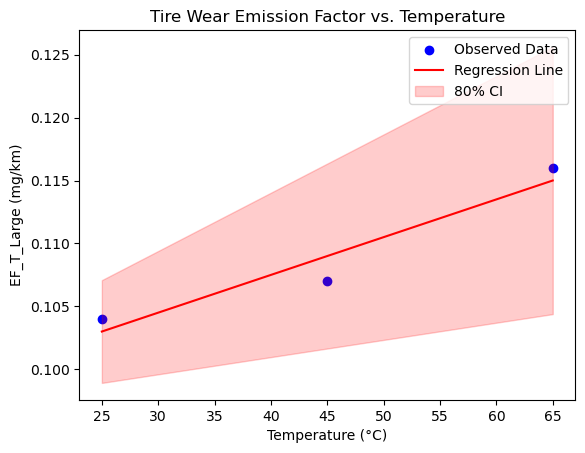

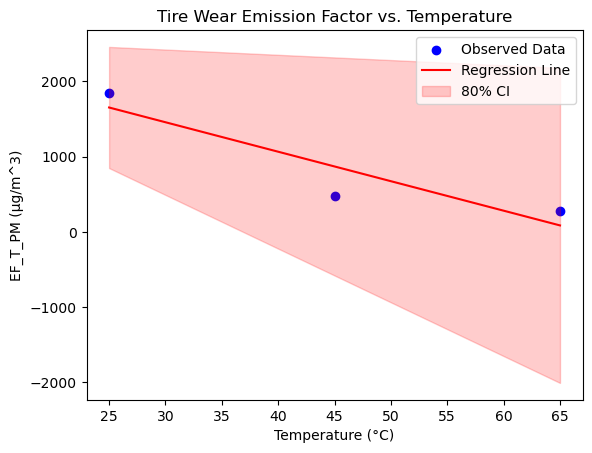

In [44]:
# Plot data and regression line for EF_Large
plt.scatter(temperature, EF_T_Large, label="Observed Data", color="blue")
plt.plot(temperature, EF_estimated_T_Large, label="Regression Line", color="red")
plt.fill_between(temperature, 
                 (slope_T_Large - slope_CI_T_Large) * temperature + intercept_T_Large, 
                 (slope_T_Large + slope_CI_T_Large) * temperature + intercept_T_Large, 
                 color='red', alpha=0.2, label="80% CI")
plt.xlabel("Temperature (°C)")
plt.ylabel("EF_T_Large (mg/km)")
plt.title("Tire Wear Emission Factor vs. Temperature")
plt.legend()
plt.show()

# Plot data and regression line for EF_PM
plt.scatter(temperature, EF_T_PM, label="Observed Data", color="blue")
plt.plot(temperature, EF_estimated_T_PM, label="Regression Line", color="red")
plt.fill_between(temperature, 
                 (slope_T_PM - slope_CI_T_PM) * temperature + intercept_T_PM, 
                 (slope_T_PM + slope_CI_T_PM) * temperature + intercept_T_PM, 
                 color='red', alpha=0.2, label="80% CI")
plt.xlabel("Temperature (°C)")
plt.ylabel("EF_T_PM (µg/m^3)")
plt.title("Tire Wear Emission Factor vs. Temperature")
plt.legend()
plt.show()

### 2. Convert to a multiplier factor (fp)

Multiplier factor for +1 °C: 1.003
95% Confidence Interval: [0.988, 1.019]

Multiplier factor for +10 °C: 1.030
95% Confidence Interval: [1.015, 1.046]



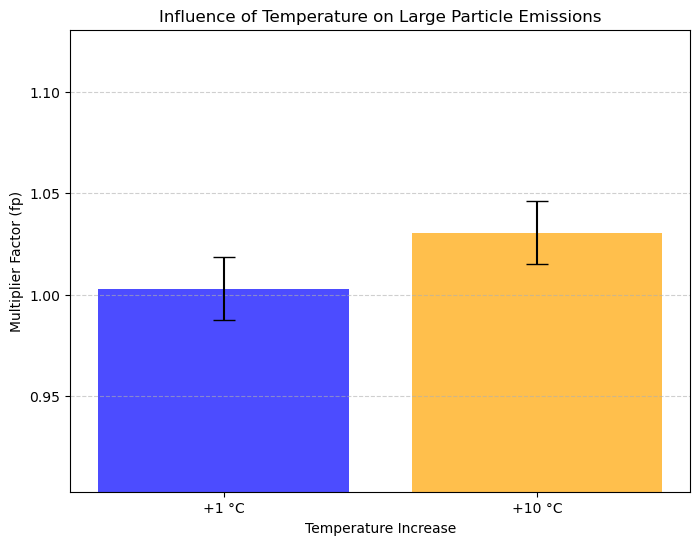

In [5]:
# Multiplier factor for Large particles
# Defining Temperature increments 
temperature_increments = {
    "+1": 1,  # (+1 °C)
    "+10": 10,  # (+10 °C)
}

T_base = 10  # Base temperature (10 °C) !! to validate !!

# Store results
fp_results_T_Large = {}

# Loop over temperature increments and compute fp
for label, increment in temperature_increments.items():
    T_new = T_base + increment  # New temperature based on baseline 

    # Compute multiplier factor (fp)
    fp_mean_T_Large = (slope_T_Large * T_new + intercept_T_Large) / (slope_T_Large * 10 + intercept_T_Large)

    # Compute t-score for confidence interval
    n = len(temperature)  # Number of data points
    t_score_T_Large = stats.t.ppf(0.975, df=n-1) if n > 1 else 1  # Avoid division by zero if n=1

    # Compute standard deviation (uncertainty)
    fp_std_T_Large = np.std(EF_T_Large, ddof=1)
    fp_CI_T_Large = t_score_T_Large * (fp_std_T_Large / np.sqrt(n)) if n > 1 else 0  # Confidence interval margin

    # Store results
    fp_results_T_Large[label] = {
        "mean_Large": fp_mean_T_Large,
        "low_Large": fp_mean_T_Large - fp_CI_T_Large,
        "high_Large": fp_mean_T_Large + fp_CI_T_Large
    }

# Print results
for label, values in fp_results_T_Large.items():
    print(f"Multiplier factor for {label} °C: {values['mean_Large']:.3f}")
    print(f"95% Confidence Interval: [{values['low_Large']:.3f}, {values['high_Large']:.3f}]\n")

# Visualization: Bar Chart with Error Bars
labels = [label + " °C" for label in fp_results_T_Large.keys()]
means = [fp_results_T_Large[label]["mean_Large"] for label in fp_results_T_Large.keys()]
errors = [fp_results_T_Large[label]["high_Large"] - fp_results_T_Large[label]["mean_Large"] for label in fp_results_T_Large.keys()]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=errors, capsize=8, color=["blue", "orange", "green"], alpha=0.7)
plt.xlabel("Temperature Increase")
plt.ylabel("Multiplier Factor (fp)")
plt.title("Influence of Temperature on Large Particle Emissions")
plt.ylim(min(means) - 0.1, max(means) + 0.1)  # Adjust y-axis for visibility
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


Multiplier factor for +1 °C: 0.983
95% Confidence Interval: [0.051, 1.914]

Multiplier factor for +10 °C: 0.825
95% Confidence Interval: [0.043, 1.607]



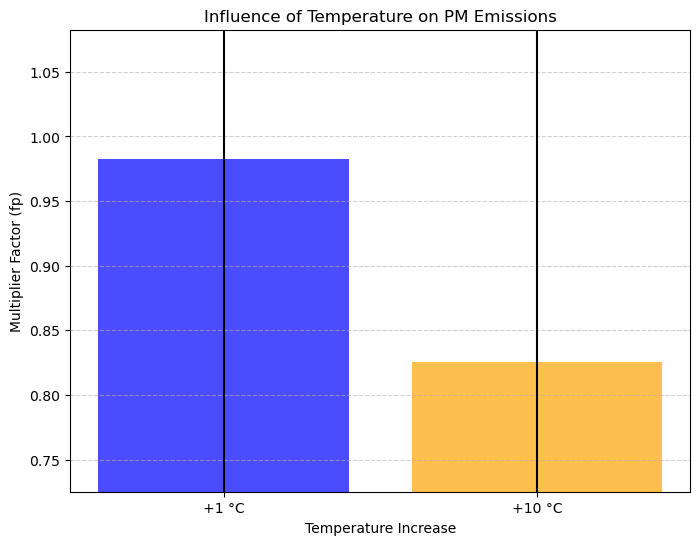

In [32]:
# Multiplier factor for PM
# Sample temperature dataset 
temperature = np.array([25, 45, 65])
EF_T_PM = np.array([1850, 475, 283])  

# Define temperature increments
temperature_increments = {
    "+1": 1,  # (+1 °C)
    "+10": 10,  # (+10 °C)
}

T_base = 10  # Base temperature (10 °C) (to validate)

# Compute regression for EF vs Temperature
slope_T_PM, intercept_T_PM, r_value_T_PM, p_value_T_PM, std_err_T_PM = stats.linregress(temperature, EF_T_PM)

# Store results
fp_results_T_PM = {}

# Loop over temperature increments
for label, increment in temperature_increments.items():
    T_new = T_base + increment  # New temperature  

    # Compute multiplier factor (fp)
    fp_mean_T_PM = (slope_T_PM * T_new + intercept_T_PM) / (slope_T_PM * T_base + intercept_T_PM)

    # Compute standard deviation (sample-based)
    fp_samples = (slope_T_PM * temperature + intercept_T_PM) / (slope_T_PM * T_base + intercept_T_PM)
    fp_std_T_PM = np.std(fp_samples, ddof=1)  # Sample standard deviation

    # Apply min-max uncertainty method
    fp_min_T_PM = np.min(fp_samples)
    fp_max_T_PM = np.max(fp_samples)
    fp_uncertainty_T_PM = (fp_max_T_PM - fp_min_T_PM) / fp_max_T_PM  # Fractional uncertainty

    # Compute lower and upper bounds
    fp_lower_T_PM = fp_mean_T_PM * (1 - fp_uncertainty_T_PM)
    fp_upper_T_PM = fp_mean_T_PM * (1 + fp_uncertainty_T_PM)

    # Store results
    fp_results_T_PM[label] = {
        "mean_PM": fp_mean_T_PM,
        "low_PM": fp_lower_T_PM,
        "high_PM": fp_upper_T_PM
    }

# Print results
for label, values in fp_results_T_PM.items():
    print(f"Multiplier factor for {label} °C: {values['mean_PM']:.3f}")
    print(f"95% Confidence Interval: [{values['low_PM']:.3f}, {values['high_PM']:.3f}]\n")

# Visualization: Bar Chart with Error Bars
labels = [label + " °C" for label in fp_results_T_PM.keys()]
means = [fp_results_T_PM[label]["mean_PM"] for label in fp_results_T_PM.keys()]
errors = [fp_results_T_PM[label]["high_PM"] - fp_results_T_PM[label]["mean_PM"] for label in fp_results_T_PM.keys()]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=errors, capsize=8, color=["blue", "orange"], alpha=0.7)
plt.xlabel("Temperature Increase")
plt.ylabel("Multiplier Factor (fp)")
plt.title("Influence of Temperature on PM Emissions")
plt.ylim(min(means) - 0.1, max(means) + 0.1)  # Adjust y-axis
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


### 3. Sensitivity analysis

In [36]:
# Sensitivity analysis: influence of the fp value on the adjusted EF
# Baseline EF in mg/km (assumed, replace with actual value)
EF_base_Large = 94  # Baseline emission factor for a passenger car in urban driving conditions, in mg/km
EF_base_PM = 8    # Baseline for Fine particles (PM), in mg/km

# Define multiplier factors and their confidence intervals for Large particles
parameters = [
    {"name": "Temperature +1 °C", "fp_T_Large": 1.03, "CI_T_Large": (1.015, 1.046),
     "fp_T_PM": 0.825, "CI_T_PM": (0.043, 1.607)},
]

# Create table with sensitivity analysis results
table_data = []
for param in parameters:
    # Large particles
    fp_mean_T_Large = param["fp_T_Large"]
    fp_lower_T_Large, fp_upper_T_Large = param["CI_T_Large"]
    EF_lower_T_Large = round(fp_lower_T_Large * EF_base_Large, 2)
    EF_mean_T_Large = round(fp_mean_T_Large * EF_base_Large, 2)
    EF_upper_T_Large = round(fp_upper_T_Large * EF_base_Large, 2)

    # Fine particles (PM)
    fp_mean_T_PM = param["fp_T_PM"]
    fp_lower_T_PM, fp_upper_T_PM = param["CI_T_PM"]
    EF_lower_T_PM = round(fp_lower_T_PM * EF_base_PM, 2)
    EF_mean_T_PM = round(fp_mean_T_PM * EF_base_PM, 2)
    EF_upper_T_PM = round(fp_upper_T_PM * EF_base_PM, 2)

    # Append row to the table
    table_data.append([param["name"], 
                       fp_lower_T_Large, fp_mean_T_Large, fp_upper_T_Large, EF_lower_T_Large, EF_mean_T_Large, EF_upper_T_Large,
                       fp_lower_T_PM, fp_mean_T_PM, fp_upper_T_PM, EF_lower_T_PM, EF_mean_T_PM, EF_upper_T_PM])

# Convert to DataFrame for display
df = pd.DataFrame(table_data, columns=[
    "Parameter", 
    "fp_T_Large (Lower)", "fp_T_Large (Mean)", "fp_T_Large (Upper)", 
    "Adjusted EF_T_Large (Lower)", "Adjusted EF_T_Large (Mean)", "Adjusted EF_T_Large (Upper)",
    "fp_T_PM (Lower)", "fp_T_PM (Mean)", "fp_T_PM (Upper)", 
    "Adjusted EF_T_PM (Lower)", "Adjusted EF_T_PM (Mean)", "Adjusted EF_T_PM (Upper)"
])

# Sort table by mean fp for Large particles (you can change to PM if needed)
df = df.sort_values(by="fp_T_Large (Mean)", ascending=False)

# Display the table
print(df.to_string(index=False))

# Save to CSV for further analysis
df.to_csv("sensitivity_Temperature_fp.csv", index=False)


        Parameter  fp_T_Large (Lower)  fp_T_Large (Mean)  fp_T_Large (Upper)  Adjusted EF_T_Large (Lower)  Adjusted EF_T_Large (Mean)  Adjusted EF_T_Large (Upper)  fp_T_PM (Lower)  fp_T_PM (Mean)  fp_T_PM (Upper)  Adjusted EF_T_PM (Lower)  Adjusted EF_T_PM (Mean)  Adjusted EF_T_PM (Upper)
Temperature +1 °C               1.015               1.03               1.046                        95.41                       96.82                        98.32            0.043           0.825            1.607                      0.34                      6.6                     12.86


## Additional vehicle load parameter for Large particles (> 10 µm)

### 1. Estimate the slope

In [27]:
# A single dataset available for Large particles from Yan et al. (2021)
# Two datasets for PM, from Yan et al. (2021) and from Kim & Lee (2018)

# Load (L) and corresponding EF (mg/km) data for Large particles:
load_Large = np.array([167, 333, 500]) #load in kg
EF_L_Large = np.array([0.097, 0.104, 0.109])

# Estimate the linear regression (EF = a*T + b) for Large particles
slope_L_Large, intercept_L_Large, r_value_L_Large, p_value_L_Large, std_err_L_Large = stats.linregress(load, EF_L_Large)

# Compute estimated EF values and uncertainty in slope
## Large particles
EF_estimated_L_Large = slope_L_Large * load + intercept_L_Large
t_score_L_Large = stats.t.ppf(0.975, df=len(load)-1)  # 95% CI for small sample (1 dataset of three data points)
slope_CI_L_Large = t_score_L_Large * std_err_L_Large  # Confidence interval for slope

# Print results
print(f"Estimated EF_L_Large formula: EF_Large(L) = {slope_L_Large:.5f} * L + {intercept_L_Large:.5f}")
print(f"95% Confidence Interval for slope: [{slope_L_Large - slope_CI_L_Large:.5f}, {slope_L_Large + slope_CI_L_Large:.5f}]")
print(f"r_value_L_Large: [{r_value_L_Large}]")
print(f"p_value_L_Large: [{p_value_L_Large}]")
print(f"std_err_L_Large: [{std_err_L_Large}]")

Estimated EF_L_Large formula: EF_Large(L) = 0.00004 * L + 0.09132
95% Confidence Interval for slope: [0.00002, 0.00005]
r_value_L_Large: [0.9952347122101348]
p_value_L_Large: [0.06217449983147565]
std_err_L_Large: [3.5300372970399344e-06]


### EF_Large vs. Load regression

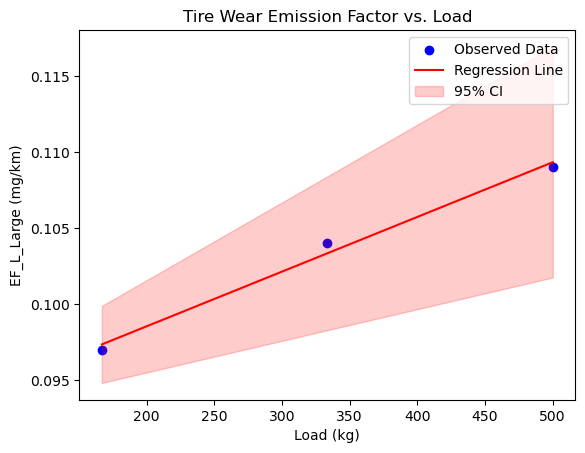

In [19]:
# Plot data and regression line for EF_Large
plt.scatter(load, EF_L_Large, label="Observed Data", color="blue")
plt.plot(load, EF_estimated_L_Large, label="Regression Line", color="red")
plt.fill_between(load, 
                 (slope_L_Large - slope_CI_L_Large) * load + intercept_L_Large, 
                 (slope_L_Large + slope_CI_L_Large) * load + intercept_L_Large, 
                 color='red', alpha=0.2, label="95% CI")
plt.xlabel("Load (kg)")
plt.ylabel("EF_L_Large (mg/km)")
plt.title("Tire Wear Emission Factor vs. Load")
plt.legend()
plt.show()

# Plot data and regression line for EF_PM
#plt.scatter(load, EF_L_PM, label="Observed Data", color="blue")
#plt.plot(load, EF_estimated_L_PM, label="Regression Line", color="red")
#plt.fill_between(load, 
#                 (slope_L_PM - slope_CI_L_PM) * load + intercept_L_PM, 
#                 (slope_L_PM + slope_CI_L_PM) * load + intercept_L_PM, 
#                 color='red', alpha=0.2, label="80% CI")
#plt.xlabel("Load (kg)")
#plt.ylabel("EF_L_PM (µg/m^3)")
#plt.title("Tire Wear Emission Factor vs. Temperature")
#plt.legend()
#plt.show()

### 2. Convert to a multiplier factor

Multiplier factor for +10 kg: 1.004
95% Confidence Interval: [0.989, 1.019]

Multiplier factor for +100 kg: 1.039
95% Confidence Interval: [1.024, 1.054]



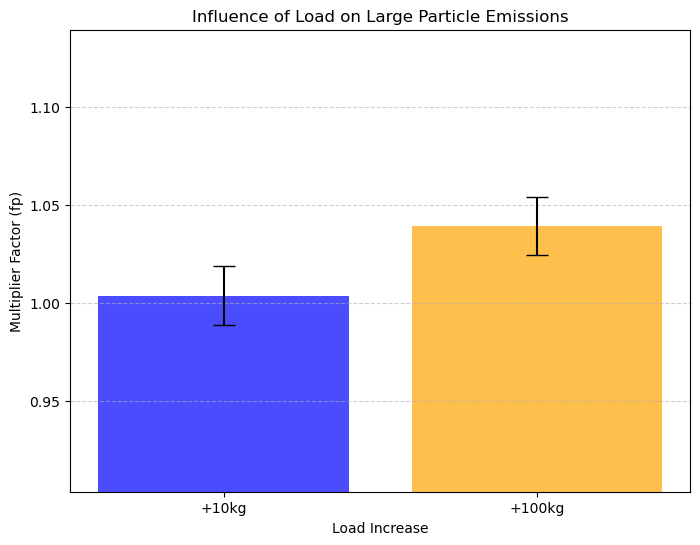

In [29]:
# Computing multiplier factors for several load increments
# Defining load increments
load_increments = {
    "+10": 10,  # (+10 kg)
    "+100": 100,  # (+100 kg)
}

# Store results
fp_results_L_Large = {}

# Loop over speed increments and compute fp
for label, increment in load_increments.items():
    L_new = 0 + increment  # Additional load carried by the vehicle

    # Compute multiplier factor (fp)
    fp_mean_L_Large = (slope_L_Large * L_new + intercept_L_Large) / (slope_L_Large * 0 + intercept_L_Large)

    # Compute t-score for confidence interval
    n = len(load_Large)  # Number of data points
    t_score_L_Large = stats.t.ppf(0.975, df=n-1) if n > 1 else 1  # Avoid division by zero if n=1

    # Compute standard deviation (uncertainty)
    fp_std_L_Large = np.std(EF_L_Large, ddof=1)
    fp_CI_L_Large = t_score_L_Large * (fp_std_L_Large / np.sqrt(n)) if n > 1 else 0  # Confidence interval margin

    # Store results
    fp_results_L_Large[label] = {
        "mean": fp_mean_L_Large,
        "low": fp_mean_L_Large - fp_CI_L_Large,
        "high": fp_mean_L_Large + fp_CI_L_Large
    }

# Print results
for label, values in fp_results_L_Large.items():
    print(f"Multiplier factor for {label} kg: {values['mean']:.3f}")
    print(f"95% Confidence Interval: [{values['low']:.3f}, {values['high']:.3f}]\n")

# Visualization: Bar Chart with Error Bars
labels = [label + "kg" for label in fp_results_L_Large.keys()]
means = [fp_results_L_Large[label]["mean"] for label in fp_results_L_Large.keys()]
errors = [fp_results_L_Large[label]["high"] - fp_results_L_Large[label]["mean"] for label in fp_results_L_Large.keys()]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=errors, capsize=8, color=["blue", "orange", "green"], alpha=0.7)
plt.xlabel("Load Increase")
plt.ylabel("Multiplier Factor (fp)")
plt.title("Influence of Load on Large Particle Emissions")
plt.ylim(min(means) - 0.1, max(means) + 0.1)  # Adjust y-axis for visibility
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Additional vehicle load parameter for PM (< 10 µm)

### 1. Estimated slope

### EF_PM vs. Load regression

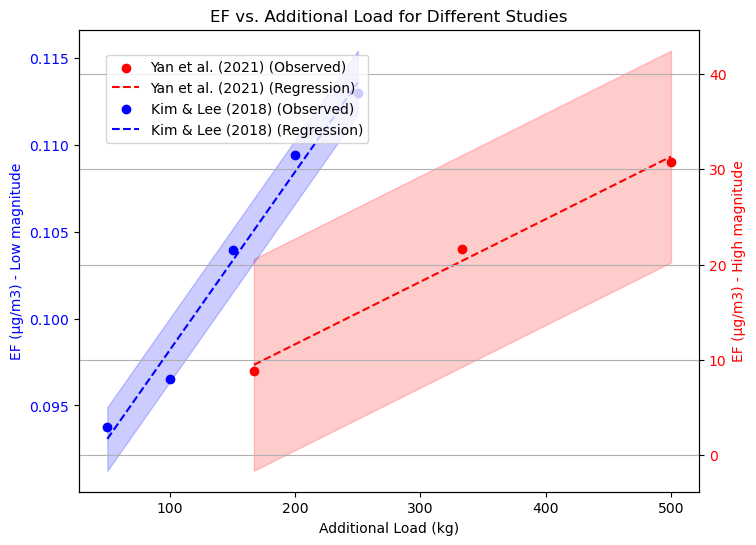

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, t

# Define datasets: (Load, EF)
datasets_L_PM = {
    "Kim & Lee (2018)": {"load_PM": [50, 100, 150, 200, 250], "EF_L_PM": [3, 8, 21.5, 31.5, 38]}, 
    "Yan et al. (2021)": {"load_PM": [167, 333, 500], "EF_L_PM": [0.097, 0.104, 0.109]},
}

# Separate datasets into two groups based on magnitude
datasets_L_PM_low = ["Yan et al. (2021)"]
datasets_L_PM_high = ["Kim & Lee (2018)"]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()  # Create secondary y-axis

# Define colors
colors = {
    "Kim & Lee (2018)": "blue",
    "Yan et al. (2021)": "red",
}

def compute_confidence_intervals(x, y, slope_L_PM, intercept_L_PM):
    """ Compute 95% confidence intervals for the regression line """
    n = len(x)
    df = n - 2  # Degrees of freedom
    t_score_L_PM = t.ppf(0.975, df)  # 95% confidence level

    # Standard error of regression
    y_pred = slope_L_PM * x + intercept_L_PM
    residuals = y - y_pred
    s_err_L_PM = np.sqrt(np.sum(residuals**2) / df)  # Standard error

    # Compute confidence interval
    CI = t_score_L_PM * s_err_L_PM / np.sqrt(n)

    return y_pred - CI, y_pred + CI

# Plot data and linear regressions for low magnitude datasets
for study in datasets_L_PM_low:
    load_PM = np.array(datasets_L_PM[study]["load_PM"])
    EF_L_PM = np.array(datasets_L_PM[study]["EF_L_PM"])

    # Compute linear regression
    slope_L_PM, intercept_L_PM, _, _, std_err_L_PM = linregress(load_PM, EF_L_PM)
    EF_estimated_L_PM = slope_L_PM * load_PM + intercept_L_PM  

    # Compute confidence intervals
    EF_lower_L_PM, EF_upper_L_PM = compute_confidence_intervals(load_PM, EF_L_PM, slope_L_PM, intercept_L_PM)

    # Plot
    ax1.scatter(load_PM, EF_L_PM, label=f"{study} (Observed)", color=colors[study])
    ax1.plot(load_PM, EF_estimated_L_PM, linestyle="dashed", color=colors[study], label=f"{study} (Regression)")
    ax1.fill_between(load_PM, EF_lower_L_PM, EF_upper_L_PM, color=colors[study], alpha=0.2)  # CI shading

ax1.set_xlabel("Additional Load (kg)")
ax1.set_ylabel("EF (µg/m3) - Low magnitude", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot data and linear regressions for high magnitude datasets
for study in datasets_L_PM_high:
    load_PM = np.array(datasets_L_PM[study]["load_PM"])
    EF_L_PM = np.array(datasets_L_PM[study]["EF_L_PM"])

    # Compute linear regression
    slope_L_PM, intercept_L_PM, _, _, std_err_L_PM = linregress(load_PM, EF_L_PM)
    EF_estimated_L_PM = slope_L_PM * load_PM + intercept_L_PM 

    # Compute confidence intervals
    EF_lower_L_PM, EF_upper_L_PM = compute_confidence_intervals(load_PM, EF_L_PM, slope_L_PM, intercept_L_PM)

    # Plot
    ax2.scatter(load_PM, EF_L_PM, label=f"{study} (Observed)", color=colors[study])
    ax2.plot(load_PM, EF_estimated_L_PM, linestyle="dashed", color=colors[study], label=f"{study} (Regression)")
    ax2.fill_between(load_PM, EF_lower_L_PM, EF_upper_L_PM, color=colors[study], alpha=0.2)  # CI shading

ax2.set_ylabel("EF (µg/m3) - High magnitude", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("EF vs. Additional Load for Different Studies")
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))
plt.grid(True)
plt.show()



### 2. Convert to a multiplier factor

Multiplier factor for +10 kg: 1.552
95% Confidence Interval: [-5.413, 8.517]

Multiplier factor for +100 kg: 6.519
95% Confidence Interval: [-63.130, 76.167]



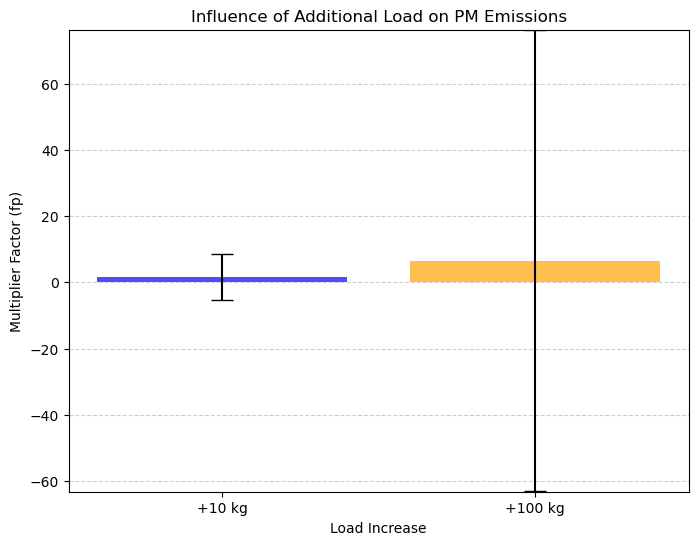

In [34]:
# Computing multiplier factors for several load increments
# Defining load increments
load_increments = {
    "+10": 10,  # (+10 kg)
    "+100": 100,  # (+100 kg)
}

# Store results
fp_results_L_PM = {key: [] for key in load_increments.keys()}

# Compute regression and multiplier factors for each dataset
for study, data in datasets_L_PM.items():
    load_PM = np.array(data["load_PM"])
    EF_L_PM = np.array(data["EF_L_PM"])
    
    # Perform linear regression
    slope_L_PM, intercept_L_PM, r_value_L_PM, p_value_L_PM, std_err_L_PM = stats.linregress(load_PM, EF_L_PM)

    # Compute multiplier factors for each load increment
    for label, increment in load_increments.items():
        load_new = load_PM[0] + increment  # Reference: first load value + increment
        fp_value = (slope_L_PM * load_new + intercept_L_PM) / (slope_L_PM * load_PM[0] + intercept_L_PM)
        fp_results_L_PM[label].append(fp_value)

# Compute mean multiplier factor and confidence interval per load increment
fp_summary_L_PM = {}

for label, fp_list_L_PM in fp_results_L_PM.items():
    if len(fp_list_L_PM) > 0:  # Avoid division by zero
        fp_mean_L_PM = np.mean(fp_list_L_PM)  # Mean fp across studies
        fp_std_L_PM = np.std(fp_list_L_PM, ddof=1)  # Sample standard deviation
        n = len(fp_list_L_PM)  # Number of datasets
        t_score_L_PM = stats.t.ppf(0.975, df=n-1) if n > 1 else 1  # Avoid div-by-zero for n=1
        fp_CI_L_PM = t_score_L_PM * (fp_std_L_PM / np.sqrt(n)) if n > 1 else 0  # Confidence interval margin

        # Store mean and CI
        fp_summary_L_PM[label] = {
            "mean": fp_mean_L_PM,
            "low": fp_mean_L_PM - fp_CI_L_PM,
            "high": fp_mean_L_PM + fp_CI_L_PM,
            "error": fp_CI_L_PM,  # For error bars in visualization
        }
    else:
        fp_summary_L_PM[label] = {"mean": np.nan, "low": np.nan, "high": np.nan, "error": np.nan}  # Handle empty cases

# Print results
for label, values in fp_summary_L_PM.items():
    print(f"Multiplier factor for {label} kg: {values['mean']:.3f}")
    print(f"95% Confidence Interval: [{values['low']:.3f}, {values['high']:.3f}]\n")

# Visualization: Bar Chart with Error Bars
labels = [label + " kg" for label in fp_summary_L_PM.keys()]
means = [fp_summary_L_PM[label]["mean"] for label in fp_summary_L_PM.keys()]
errors = [fp_summary_L_PM[label]["error"] for label in fp_summary_L_PM.keys()]

plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=errors, capsize=8, color=["blue", "orange"], alpha=0.7)
plt.xlabel("Load Increase")
plt.ylabel("Multiplier Factor (fp)")
plt.title("Influence of Additional Load on PM Emissions")
plt.ylim(min([val["low"] for val in fp_summary_L_PM.values() if not np.isnan(val["low"])]) - 0.1, 
         max([val["high"] for val in fp_summary_L_PM.values() if not np.isnan(val["high"])]) + 0.1)  # Adjust y-axis
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [36]:
# Print individual fp values for each dataset
for label, fp_list_L_PM in fp_results_L_PM.items():
    print(f"\nLoad Increase: {label.replace('plus', '+')} kg")
    for i, study in enumerate(datasets_L_PM.keys()):
        print(f"  {study}: fp = {fp_list_L_PM[i]:.3f}")


Load Increase: +10 kg
  Kim & Lee (2018): fp = 2.100
  Yan et al. (2021): fp = 1.004

Load Increase: +100 kg
  Kim & Lee (2018): fp = 12.000
  Yan et al. (2021): fp = 1.037


### 3. Sensitivity analysis

In [45]:
# Sensitivity analysis: influence of the fp value on the adjusted EF
# Baseline EF in mg/km (assumed, replace with actual value)
EF_base_Large = 80  # Baseline emission factor for a passenger car in urban driving conditions, in mg/km
EF_base_PM = 7    # Baseline for Fine particles (PM), in mg/km

# Define multiplier factors and their confidence intervals for Large particles
parameters = [
    {"name": "Load +10 kg", "fp_L_Large": 1.004, "CI_L_Large": (0.989, 1.019),
     "fp_L_PM": 1.552, "CI_L_PM": (-5.413, 8.517)},
]

# Create table with sensitivity analysis results
table_data = []
for param in parameters:
    # Large particles
    fp_mean_L_Large = param["fp_L_Large"]
    fp_lower_L_Large, fp_upper_L_Large = param["CI_L_Large"]
    EF_lower_L_Large = round(fp_lower_L_Large * EF_base_Large, 2)
    EF_mean_L_Large = round(fp_mean_L_Large * EF_base_Large, 2)
    EF_upper_L_Large = round(fp_upper_L_Large * EF_base_Large, 2)

    # Fine particles (PM)
    fp_mean_L_PM = param["fp_L_PM"]
    fp_lower_L_PM, fp_upper_L_PM = param["CI_L_PM"]
    EF_lower_L_PM = round(fp_lower_L_PM * EF_base_PM, 2)
    EF_mean_L_PM = round(fp_mean_L_PM * EF_base_PM, 2)
    EF_upper_L_PM = round(fp_upper_L_PM * EF_base_PM, 2)

    # Append row to the table
    table_data.append([param["name"], 
                       fp_lower_L_Large, fp_mean_L_Large, fp_upper_L_Large, EF_lower_L_Large, EF_mean_L_Large, EF_upper_L_Large,
                       fp_lower_L_PM, fp_mean_L_PM, fp_upper_L_PM, EF_lower_L_PM, EF_mean_L_PM, EF_upper_L_PM])

# Convert to DataFrame for display
df = pd.DataFrame(table_data, columns=[
    "Parameter", 
    "fp_L_Large (Lower)", "fp_L_Large (Mean)", "fp_L_Large (Upper)", 
    "Adjusted EF_L_Large (Lower)", "Adjusted EF_L_Large (Mean)", "Adjusted EF_L_Large (Upper)",
    "fp_v_PM (Lower)", "fp_L_PM (Mean)", "fp_L_PM (Upper)", 
    "Adjusted EF_L_PM (Lower)", "Adjusted EF_L_PM (Mean)", "Adjusted EF_L_PM (Upper)"
])

# Sort table by mean fp for Large particles 
df = df.sort_values(by="fp_L_Large (Mean)", ascending=False)

# Display the table
print(df.to_string(index=False))

# Save to CSV for further analysis
#df.to_csv("sensitivity_Load_fp.csv", index=False)


  Parameter  fp_L_Large (Lower)  fp_L_Large (Mean)  fp_L_Large (Upper)  Adjusted EF_L_Large (Lower)  Adjusted EF_L_Large (Mean)  Adjusted EF_L_Large (Upper)  fp_v_PM (Lower)  fp_L_PM (Mean)  fp_L_PM (Upper)  Adjusted EF_L_PM (Lower)  Adjusted EF_L_PM (Mean)  Adjusted EF_L_PM (Upper)
Load +10 kg               0.989              1.004               1.019                        79.12                       80.32                        81.52           -5.413           1.552            8.517                    -37.89                    10.86                     59.62


## Driving environment for Large particles (> 10 µm) and PM (< 10 µm)

### 1. EF vs. Driving environment

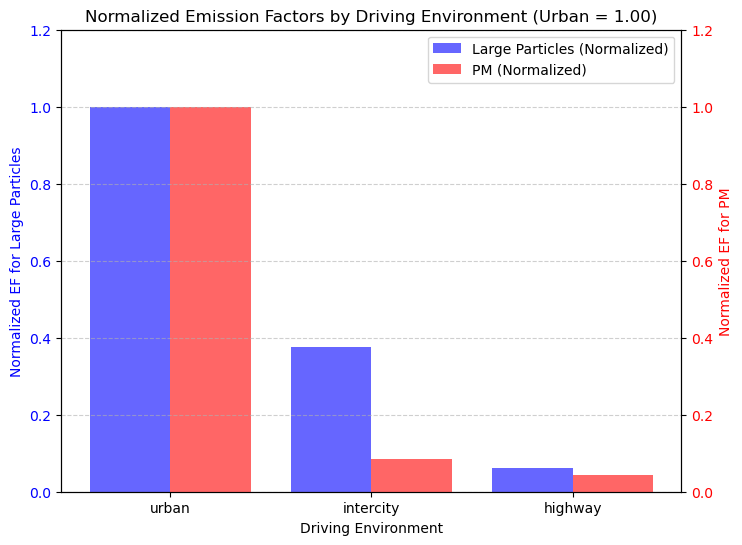

In [11]:
# "Driving environment" considers the effect of speed and road topology (curvature), and frequency of braking/acceleration events on Urban, Intercity, and Highway roads.
# A single dataset is available for Large particles, from Le Maître et al. (1998) and one for PM, from Kwak et al. (2013)

# Datsets for the Driving Environment (DE):
driving_env = np.array(["urban", "intercity", "highway"])
EF_DE_Large = np.array([80, 30, 5]) # EF in mg/km for Large particles
EF_DE_PM = np.array([27169, 2294, 1147]) # EF proportional to concentration in µg/m3

# Normalize by Urban EF (Urban = 1.00)
EF_DE_Large_norm = EF_DE_Large / EF_DE_Large[0]  # Normalize Large particles
EF_DE_PM_norm = EF_DE_PM / EF_DE_PM[0]  # Normalize PM

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(driving_env))

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized Large particles
ax1.bar(x - bar_width/2, EF_DE_Large_norm, bar_width, color='blue', alpha=0.6, label="Large Particles (Normalized)")
ax1.set_xlabel("Driving Environment")
ax1.set_ylabel("Normalized EF for Large Particles", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(0, 1.2)  # Keep the scale consistent

# Create secondary axis for PM (normalized)
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, EF_DE_PM_norm, bar_width, color='red', alpha=0.6, label="PM (Normalized)")
ax2.set_ylabel("Normalized EF for PM", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(0, 1.2)

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(driving_env)

# Title and legend
plt.title("Normalized Emission Factors by Driving Environment (Urban = 1.00)")
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show plot
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

### 2. Convert to a multiplier factor (fp)

        Condition Particle  fp Mean  Uncertainty (%)  95% CI Lower  95% CI Upper
Urban → Intercity    Large 0.375000        35.860842      0.240522      0.509478
  Urban → Highway    Large 0.062500        35.707142      0.040183      0.084817
Urban → Intercity       PM 0.084434        43.886217      0.047379      0.121489
  Urban → Highway       PM 0.042217        51.176166      0.020612      0.063822


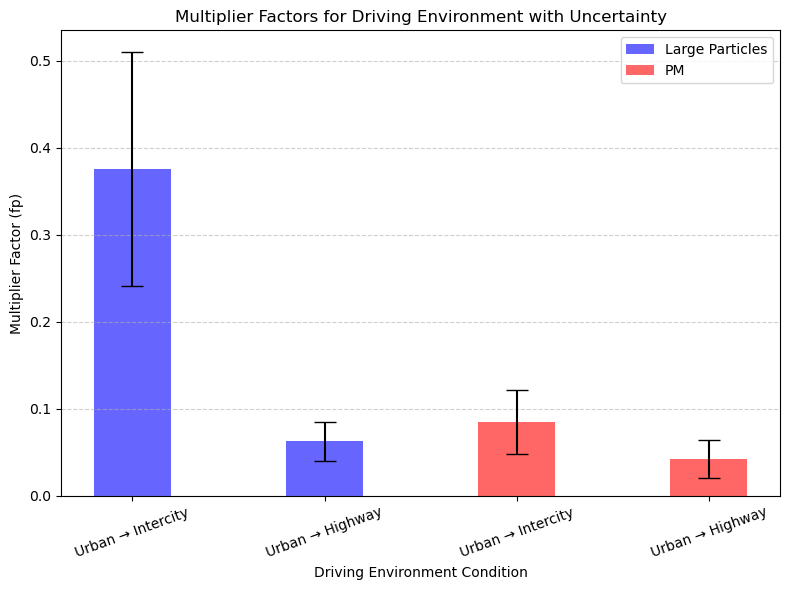

In [5]:
# Multiplier factors (fp) for Driving Environment (Urban → Intercity, Urban → Highway)

## Unceratinty evaluation for fp_Driving_Environment
## Given that we only have one data point for Intercity and Highway driving, we cannot estimate a CI for the calculated ratios. 
## Instead, given that the driving environment is a function of speed influence, road curvature and frequency of braking/acceleration events, the uncertainty will be a function of these three parameters.
## We use the uncertainty of the speed fp as a lower bound and estimate an uncertainty range for road curvature and braking frequency.


fp_DE = {
    "Large_Intercity": 0.3750,
    "Large_Highway": 0.0625,
    "PM_Intercity": 0.084434,
    "PM_Highway": 0.042217
}

# Uncertainties from Speed Influence, retrieved from the speed_fp uncertainty evaluation
uncertainty_speed = {
    "Large_Intercity": 0.06,  # ±6%
    "Large_Highway": 0.05,   # ±5%
    "PM_Intercity": 0.26,     # ±26%
    "PM_Highway": 0.37,      # ±37%
}

# Assumed uncertainties for Road curvature and braking (from expert judgment)
uncertainty_curvature = 0.25  # ±25%
uncertainty_braking = 0.25  # ±25%

# Store results
results = []
conditions = []
particles = []
means = []
errors = []

# Compute uncertainties and confidence intervals
for key, fp_value in fp_DE.items():
    uncertainty_speed_value = uncertainty_speed[key]

    # Compute total uncertainty using error propagation
    total_uncertainty = np.sqrt(uncertainty_speed_value**2 + uncertainty_curvature**2 + uncertainty_braking**2)

    # Compute confidence intervals
    fp_lower = fp_value * (1 - total_uncertainty)
    fp_upper = fp_value * (1 + total_uncertainty)
    error_margin = fp_upper - fp_value  # Difference between mean and upper bound

    # Extract Driving Condition and Particle Type
    driving_condition = key.replace("Large_", "Urban → ").replace("PM_", "Urban → ")
    particle_type = "Large" if "Large" in key else "PM"

    # Store results
    results.append({
        "Condition": driving_condition,
        "Particle": particle_type,
        "fp Mean": fp_value,
        "Uncertainty (%)": total_uncertainty * 100,
        "95% CI Lower": fp_lower,
        "95% CI Upper": fp_upper
    })


# Formatting for visualization
    conditions.append(driving_condition)
    particles.append(particle_type)
    means.append(fp_value)
    errors.append(error_margin)

# Convert results to DataFrame
df_DE_uncertainty_results = pd.DataFrame(results)

# Print formatted table
print(df_DE_uncertainty_results.to_string(index=False))

# Visualization: Bar Chart with Error Bar
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(conditions))

# Separate indices for Large and PM
x_large = [i for i, part in enumerate(particles) if part == "Large"]
x_pm = [i for i, part in enumerate(particles) if part == "PM"]
means_large = [means[i] for i in x_large]
means_pm = [means[i] for i in x_pm]
errors_large = [errors[i] for i in x_large]
errors_pm = [errors[i] for i in x_pm]

# Plot bars with error bars
ax.bar(x_large, means_large, bar_width, yerr=errors_large, capsize=8, color='blue', alpha=0.6, label="Large Particles")
ax.bar(x_pm, means_pm, bar_width, yerr=errors_pm, capsize=8, color='red', alpha=0.6, label="PM")

# Formatting
ax.set_xlabel("Driving Environment Condition")
ax.set_ylabel("Multiplier Factor (fp)")
ax.set_xticks(x)
ax.set_xticklabels(conditions, rotation=20)
ax.set_title("Multiplier Factors for Driving Environment with Uncertainty")
ax.legend()
ax.grid(axis='y', linestyle="--", alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


### 3. Sensitivity analysis

In [58]:

# Baseline EF values for passenger cars in urban driving
EF_base_Large = 94  # mg/km
EF_base_PM = 8      # mg/km

# Define multiplier factors and their confidence intervals for Large particles & PM
parameters_DE = [
    {"DE": "Intercity", 
     "fp_Large": 0.375, "CI_Large": (0.2405, 0.5095), 
     "fp_PM": 0.0844, "CI_PM": (0.0474, 0.1215)},
    
    {"DE": "Highway", 
     "fp_Large": 0.0625, "CI_Large": (0.0402, 0.0848), 
     "fp_PM": 0.0422, "CI_PM": (0.0206, 0.0638)}
]

# Create table with sensitivity analysis results
table_data = []
for param in parameters_DE:
    # Extract driving environment
    condition = f"Urban → {param['DE']}"  # Standardized Condition Format

    # Large Particles
    fp_mean_DE_Large = param["fp_Large"]
    fp_lower_DE_Large, fp_upper_DE_Large = param["CI_Large"]
    EF_lower_DE_Large = round(fp_lower_DE_Large * EF_base_Large, 2)
    EF_mean_DE_Large = round(fp_mean_DE_Large * EF_base_Large, 2)
    EF_upper_DE_Large = round(fp_upper_DE_Large * EF_base_Large, 2)

    # Fine Particles (PM)
    fp_mean_DE_PM = param["fp_PM"]
    fp_lower_DE_PM, fp_upper_DE_PM = param["CI_PM"]
    EF_lower_DE_PM = round(fp_lower_DE_PM * EF_base_PM, 2)
    EF_mean_DE_PM = round(fp_mean_DE_PM * EF_base_PM, 2)
    EF_upper_DE_PM = round(fp_upper_DE_PM * EF_base_PM, 2)

    # Append rows separately for Large and PM
    table_data.append([
        condition, "Large",
        round(fp_lower_DE_Large, 4), round(fp_mean_DE_Large, 4), round(fp_upper_DE_Large, 4),
        EF_lower_DE_Large, EF_mean_DE_Large, EF_upper_DE_Large
    ])
    
    table_data.append([
        condition, "PM",
        round(fp_lower_DE_PM, 4), round(fp_mean_DE_PM, 4), round(fp_upper_DE_PM, 4),
        EF_lower_DE_PM, EF_mean_DE_PM, EF_upper_DE_PM
    ])

# Convert to DataFrame
df = pd.DataFrame(table_data, columns=[
    "Condition", "Pollutant",
    "fp_DE (Lower)", "fp_DE (Mean)", "fp_DE (Upper)",
    "Adjusted EF (Lower)", "Adjusted EF (Mean)", "Adjusted EF (Upper)"
])

# Sort table by Condition (Urban → Intercity first)
df = df.sort_values(by=["Condition", "Pollutant"], ascending=[True, False])

# Display the table
print(df.to_string(index=False))

# Save to CSV for further analysis
#df.to_csv("sensitivity_Driving_Environment_fp.csv", index=False)


        Condition Pollutant  fp_DE (Lower)  fp_DE (Mean)  fp_DE (Upper)  Adjusted EF (Lower)  Adjusted EF (Mean)  Adjusted EF (Upper)
  Urban → Highway        PM         0.0206        0.0422         0.0638                 0.16                0.34                 0.51
  Urban → Highway     Large         0.0402        0.0625         0.0848                 3.78                5.88                 7.97
Urban → Intercity        PM         0.0474        0.0844         0.1215                 0.38                0.68                 0.97
Urban → Intercity     Large         0.2405        0.3750         0.5095                22.61               35.25                47.89


## Driving behavior for Large particles (> 10 µm) only

### 1. EF vs. Driving Behavior
### 2. Convert to multiplier factor

In [26]:
# "Driving behavior" refers to the aggressivity of the driving style
# A single dataset is available for Large particles, from Le Maître et al. (1998)

# Driving style dataset: Smooth vs Aggressive EF at similar speeds
speed_DB = np.array([58, 68])  # Reference speeds (averaged)
EF_smooth = np.array([46, 76])  # EF for smooth driving (smooth driving is assimilated to the customer driver in the referred study)
EF_aggressive = np.array([88, 190])  # EF for aggressive driving (aggressive driving is assimilated to the professional driver in the referred study)

# Compute multiplier factors (fp) at each reference speed
fp_DB = EF_aggressive / EF_smooth

# Compute mean multiplier factor and standard deviation
fp_DB_mean = np.mean(fp_DB)
fp_DB_std = np.std(fp_DB, ddof=1)  # Sample standard deviation

# Uncertainty: (Max - Min) / Max
fp_DB_min = np.min(fp_DB)
fp_DB_max = np.max(fp_DB)
fp_DB_uncertainty = (fp_DB_max - fp_DB_min) / fp_DB_max  # Uncertainty as fraction
fp_DB_lower = fp_DB_mean * (1 - fp_DB_uncertainty)
fp_DB_upper = fp_DB_mean * (1 + fp_DB_uncertainty)

# Print results
#print(f"Multiplier Factor (Smooth → Aggressive driving): {fp_DB_mean:.3f}")
#print(f"Unceratinty range: [{fp_DB_lower:.3f}, {fp_DB_upper:.3f}]")

# Store results in a DataFrame
df_DB = pd.DataFrame({
    "Condition": ["Smooth → Aggressive driving"],
    "Particle": ["Large"],
    "fp_Driving Behavior (Mean)": [fp_DB_mean],
    "fp_Driving Behavior (Lower)": [fp_DB_lower],
    "fp_Driving Behavior (Upper)": [fp_DB_upper]
})

# Print table
print(df_DB.to_string(index=False))

# Save to CSV
#df_DB.to_csv("sensitivity_Driving_Behavior_fp.csv", index=False)


                  Condition Particle  fp_Driving Behavior (Mean)  fp_Driving Behavior (Lower)  fp_Driving Behavior (Upper)
Smooth → Aggressive driving    Large                    2.206522                     1.688469                     2.724575


### 3. Sensitivity analysis

In [30]:
# Sensitivity analysis for Driving Behavior parameter
# Baseline EF values for passenger cars in urban driving
EF_base_Large = 94  # mg/km
#EF_base_PM = 8      # mg/km

# Define multiplier factors and their confidence intervals for Large particles & PM
parameters_DB = [ 
    {"DB": "Aggressive", 
     "fp_DB_Large": 2.207, "CI_DB_Large": (1.688, 2.725)}, # 23% 
]

# Create table with sensitivity analysis results
table_data = []
for param in parameters_DB:
    # Extract driving environment
    condition = f"Smooth → {param['DB']} driving"  

    # Large Particles
    fp_mean_DB_Large = param["fp_DB_Large"]
    fp_lower_DB_Large, fp_upper_DB_Large = param["CI_DB_Large"]
    EF_lower_DB_Large = round(fp_lower_DB_Large * EF_base_Large, 2)
    EF_mean_DB_Large = round(fp_mean_DB_Large * EF_base_Large, 2)
    EF_upper_DB_Large = round(fp_upper_DB_Large * EF_base_Large, 2)

    # Append rows separately for Large and PM
    table_data.append([
        condition, "Large",
        round(fp_lower_DB_Large, 4), round(fp_mean_DB_Large, 4), round(fp_upper_DB_Large, 4),
        EF_lower_DB_Large, EF_mean_DB_Large, EF_upper_DB_Large
    ])
    
# Convert to DataFrame
df = pd.DataFrame(table_data, columns=[
    "Condition", "Particle",
    "fp_DB (Lower)", "fp_DB (Mean)", "fp_DB (Upper)",
    "Adjusted EF (Lower)", "Adjusted EF (Mean)", "Adjusted EF (Upper)"
])

# Sort table by Condition (Urban → Intercity first)
df = df.sort_values(by=["Condition", "Particle"], ascending=[True, False])

# Display the table
print(df.to_string(index=False))

# Save to CSV for further analysis
df.to_csv("sensitivity_Driving_Behavior_fp.csv", index=False)


                  Condition Particle  fp_DB (Lower)  fp_DB (Mean)  fp_DB (Upper)  Adjusted EF (Lower)  Adjusted EF (Mean)  Adjusted EF (Upper)
Smooth → Aggressive driving    Large          1.688         2.207          2.725               158.67              207.46               256.15


## Road texture for Large particles (> 10 µm) only

### 1. EF vs. Road texture
### 2. Convert to a multiplier factor (fp)

In [19]:
# A single dataset is available for Large particles, from Lowne et al. (1970)
# data for tire wear on polished and harsh surfaces at similar test speeds

# Road texture dataset: Speed (km/h) and EF (mg/km), assumed in urban environment
speed_RT = np.array([25, 50])  # Speed values
EF_harsh = np.array([4.27, 38.91])  # EF values on rough, harsh, macadam
EF_polished = np.array([1.93, 10.78])  # EF values on rough, polished, macadam

# Compute multiplier factors (fp) at each reference speed
fp_RT = EF_harsh / EF_polished

# Compute mean multiplier factor and standard deviation
fp_RT_mean = np.mean(fp_RT)
fp_std_RT = np.std(fp_RT, ddof=1)  # Sample standard deviation

# Uncertainty: (Max - Min) / Max
fp_RT_min = np.min(fp_RT)
fp_RT_max = np.max(fp_RT)
fp_RT_uncertainty = (fp_RT_max - fp_RT_min) / fp_RT_max  # Uncertainty as fraction
fp_RT_lower = fp_RT_mean * (1 - fp_RT_uncertainty)
fp_RT_upper = fp_RT_mean * (1 + fp_RT_uncertainty)

# Print results
#print(f"Multiplier Factor (Polished → Harsh surface): {fp_RT_mean:.3f}")
#print(f"Unceratinty range: [{fp_RT_lower:.3f}, {fp_RT_upper:.3f}]")

# Store results in a DataFrame
df_RT = pd.DataFrame({
    "Condition": ["Polished → Harsh surface"],
    "Particle": ["Large"],
    "fp_Road Texture (Mean)": [fp_RT_mean],
    "fp_Road Texture (Lower)": [fp_RT_lower],
    "fp_Road Texture (Upper)": [fp_RT_upper]
})

# Print table
print(df_RT.to_string(index=False))

# Save to CSV
#df_RT.to_csv("sensitivity_Road_Texture_fp.csv", index=False)


               Condition Particle  fp_Road Texture (Mean)  fp_Road Texture (Lower)  fp_Road Texture (Upper)
Polished → Harsh surface    Large                2.910949                 1.784278                 4.037619


### 3. Sensitivity analysis

In [24]:
# Sensitivity analysis for Road texture parameter
# Baseline EF values for passenger cars in urban driving
EF_base_Large = 94  # mg/km
#EF_base_PM = 8     # mg/km

# Define multiplier factors and their confidence intervals for Large particles
parameters_RT = [
    {"RT": "Harsh", 
     "fp_RT_Large": 2.911, "CI_RT_Large": (1.784, 4.038)}, # 38%  
]

# Create table with sensitivity analysis results
table_data = []
for param in parameters_RT:
    # Extract driving environment
    condition = f"Polished → {param['RT']} surface"  

    # Large Particles
    fp_mean_RT_Large = param["fp_RT_Large"]
    fp_lower_RT_Large, fp_upper_RT_Large = param["CI_RT_Large"]
    EF_lower_RT_Large = round(fp_lower_RT_Large * EF_base_Large, 2)
    EF_mean_RT_Large = round(fp_mean_RT_Large * EF_base_Large, 2)
    EF_upper_RT_Large = round(fp_upper_RT_Large * EF_base_Large, 2)

    # Append rows separately for Large and PM
    table_data.append([
        condition, "Large",
        round(fp_lower_RT_Large, 4), round(fp_mean_RT_Large, 4), round(fp_upper_RT_Large, 4),
        EF_lower_RT_Large, EF_mean_RT_Large, EF_upper_RT_Large
    ])
    

# Convert to DataFrame
df_RT = pd.DataFrame(table_data, columns=[
    "Condition", "Particle",
    "fp_RT (Lower)", "fp_RT (Mean)", "fp_RT (Upper)",
    "Adjusted EF (Lower)", "Adjusted EF (Mean)", "Adjusted EF (Upper)"
])

# Sort table by Condition (Urban → Intercity first)
df_RT = df_RT.sort_values(by=["Condition", "Particle"], ascending=[True, False])

# Display the table
print(df_RT.to_string(index=False))

# Save to CSV for further analysis
df_RT.to_csv("sensitivity_Road_Texture_fp.csv", index=False)


               Condition Particle  fp_RT (Lower)  fp_RT (Mean)  fp_RT (Upper)  Adjusted EF (Lower)  Adjusted EF (Mean)  Adjusted EF (Upper)
Polished → Harsh surface    Large          1.784         2.911          4.038                167.7              273.63               379.57


## Tire type for all particles

### 1. EF vs. Tire type
### 2. Convert to a multiplier factor (fp)

In [32]:
# A single dataset is available for total tire wear (assumed all particles) from Polukarova et al. (2024)
# data for tire wear of summer tires, studless winter tires and studded winter tires in similar experimental settings

# Tire wear rates (mg/km) for different tire types
EF_tire = {
    "summer": 22,
    "winter_studless": 27,
    "winter_studded": 25
}

# Compute multiplier factors (fp)
fp_winter_studless = EF_tire["winter_studless"] / EF_tire["summer"]
fp_winter_studded = EF_tire["winter_studded"] / EF_tire["summer"]

# Define uncertainty assumption 
uncertainty_high = 0.20  # ±20% (to be refined with more data)

# Compute confidence intervals
fp_winter_studless_low = fp_winter_studless * (1 - uncertainty_high)
fp_winter_studless_high = fp_winter_studless * (1 + uncertainty_high)

fp_winter_studded_low = fp_winter_studded * (1 - uncertainty_high)
fp_winter_studded_high = fp_winter_studded * (1 + uncertainty_high)

# Store results in DataFrame
df_tire_type = pd.DataFrame({
    "Condition": ["Summer → Winter Studless", "Summer → Winter Studded"],
    "fp_Tire Type (Mean)": [fp_winter_studless, fp_winter_studded],
    "fp_Tire Type (Lower)": [fp_winter_studless_low, fp_winter_studded_low],
    "fp_Tire Type (Upper)": [fp_winter_studless_high, fp_winter_studded_high]
})

# Print results
print(df_tire_type.to_string(index=False))

# Save to CSV
#df_tire_type.to_csv("sensitivity_Tire_Type_fp.csv", index=False)


               Condition  fp_Tire Type (Mean)  fp_Tire Type (Lower)  fp_Tire Type (Upper)
Summer → Winter Studless             1.227273              0.981818              1.472727
 Summer → Winter Studded             1.136364              0.909091              1.363636


### 3. Sensitivity analysis

In [34]:
# Sensitivity analysis for Tire type parameter
# Baseline EF values for passenger cars in urban driving
EF_base_Large = 94  # mg/km
EF_base_PM = 8     # mg/km

# Define multiplier factors (fp) and confidence intervals for Tire Type
parameters_Tire = [
    {"Tire": "Winter Studless", 
     "fp_Tire_Large": 1.227, "CI_Tire_Large": (0.982, 1.472)},  # ±20% uncertainty
    {"Tire": "Winter Studded", 
     "fp_Tire_Large": 1.136, "CI_Tire_Large": (0.909, 1.364)}   # ±20% uncertainty
]

# Store sensitivity analysis results
table_data = []

for param in parameters_Tire:
    # Extract condition
    condition = f"Summer → {param['Tire']} Tires"

    # Large Particles
    fp_mean_Tire_Large = param["fp_Tire_Large"]
    fp_lower_Tire_Large, fp_upper_Tire_Large = param["CI_Tire_Large"]
    EF_lower_Tire_Large = round(fp_lower_Tire_Large * EF_base_Large, 2)
    EF_mean_Tire_Large = round(fp_mean_Tire_Large * EF_base_Large, 2)
    EF_upper_Tire_Large = round(fp_upper_Tire_Large * EF_base_Large, 2)

    # PM (Assume same fp as Large Particles due to lack of PM-specific data)
    fp_mean_Tire_PM = param["fp_Tire_Large"]
    fp_lower_Tire_PM, fp_upper_Tire_PM = param["CI_Tire_Large"]
    EF_lower_Tire_PM = round(fp_lower_Tire_PM * EF_base_PM, 2)
    EF_mean_Tire_PM = round(fp_mean_Tire_PM * EF_base_PM, 2)
    EF_upper_Tire_PM = round(fp_upper_Tire_PM * EF_base_PM, 2)

    # Append rows separately for Large and PM
    table_data.append([
        condition, "Large",
        round(fp_lower_Tire_Large, 4), round(fp_mean_Tire_Large, 4), round(fp_upper_Tire_Large, 4),
        EF_lower_Tire_Large, EF_mean_Tire_Large, EF_upper_Tire_Large
    ])
    
    table_data.append([
        condition, "PM",
        round(fp_lower_Tire_PM, 4), round(fp_mean_Tire_PM, 4), round(fp_upper_Tire_PM, 4),
        EF_lower_Tire_PM, EF_mean_Tire_PM, EF_upper_Tire_PM
    ])

# Convert to DataFrame
df_Tire = pd.DataFrame(table_data, columns=[
    "Condition", "Particle",
    "fp_Tire (Lower)", "fp_Tire (Mean)", "fp_Tire (Upper)",
    "Adjusted EF (Lower)", "Adjusted EF (Mean)", "Adjusted EF (Upper)"
])

# Sort table by Condition (Summer → Winter Studless first)
df_Tire = df_Tire.sort_values(by=["Condition", "Particle"], ascending=[True, False])

# Display the table
print(df_Tire.to_string(index=False))

# Save to CSV for further analysis
df_Tire.to_csv("sensitivity_Tire_Type_fp.csv", index=False)


                     Condition Particle  fp_Tire (Lower)  fp_Tire (Mean)  fp_Tire (Upper)  Adjusted EF (Lower)  Adjusted EF (Mean)  Adjusted EF (Upper)
 Summer → Winter Studded Tires       PM            0.909           1.136            1.364                 7.27                9.09                10.91
 Summer → Winter Studded Tires    Large            0.909           1.136            1.364                85.45              106.78               128.22
Summer → Winter Studless Tires       PM            0.982           1.227            1.472                 7.86                9.82                11.78
Summer → Winter Studless Tires    Large            0.982           1.227            1.472                92.31              115.34               138.37


## Humidity for Large particles (> 10 µm) only

### 1. EF vs. Humidity

### 2. Convert to a multiplier factor (fp)

In [3]:
# A single dataset is available for Large particles, from Le Maître et al. (1998)
# The study reports tir wear rates for two different tread compounds under dry and wet conditions reported. We calculate an average multiplier factor for passing from dry to wet conditions.

# Defining datasets: EF (mg/km) 
tread_1_dry = np.array([88.5, 109])  # Autumn & Winter dry
tread_1_wet = np.array([50.6, 71.3])  # Autumn & Winter wet

tread_2_dry = np.array([79.2, 94.2])  # Autumn & Winter dry
tread_2_wet = np.array([57.8, 76.6])  # Autumn & Winter wet

# Compute wet/dry ratio for each tread compound
fp_wet_dry_1 = tread_1_wet / tread_1_dry
fp_wet_dry_2 = tread_2_wet / tread_2_dry

# Combine both datasets
fp_wet_dry = np.concatenate((fp_wet_dry_1, fp_wet_dry_2))

# Compute mean multiplier factor and standard deviation
fp_wet_dry_mean = np.mean(fp_wet_dry)
fp_wet_dry_std = np.std(fp_wet_dry, ddof=1)  # Sample standard deviation

# Uncertainty: (Max - Min) / Max
fp_wet_dry_min = np.min(fp_wet_dry)
fp_wet_dry_max = np.max(fp_wet_dry)
fp_wet_dry_uncertainty = (fp_wet_dry_max - fp_wet_dry_min) / fp_wet_dry_max  
fp_wet_dry_lower = fp_wet_dry_mean * (1 - fp_wet_dry_uncertainty)
fp_wet_dry_upper = fp_wet_dry_mean * (1 + fp_wet_dry_uncertainty)

# Print results
print(f"Multiplier Factor (Dry → Wet Road): {fp_wet_dry_mean:.3f}")
print(f"Uncertainty range: [{fp_wet_dry_lower:.3f}, {fp_wet_dry_upper:.3f}]")

# Store results in a DataFrame
df_humidity = pd.DataFrame({
    "Condition": ["Dry → Wet Road"],
    "Particle": ["Large"],
    "fp_Road Humidity (Mean)": [fp_wet_dry_mean],
    "fp_Road Humidity (Lower)": [fp_wet_dry_lower],
    "fp_Road Humidity (Upper)": [fp_wet_dry_upper]
})

# Print table
print(df_humidity.to_string(index=False))

# Save to CSV
#df_humidity.to_csv("sensitivity_Road_Humidity_fp.csv", index=False)


Multiplier Factor (Dry → Wet Road): 0.692
Uncertainty range: [0.487, 0.898]
     Condition Particle  fp_Road Humidity (Mean)  fp_Road Humidity (Lower)  fp_Road Humidity (Upper)
Dry → Wet Road    Large                  0.69221                  0.486707                  0.897714


### 3. Sensitivity analysis

In [7]:
# Sensitivity analysis for Road Humidity parameter
# Baseline EF values for passenger cars in urban driving
EF_base_Large = 94  # mg/km
#EF_base_PM = 8     # mg/km

# Define multiplier factors and their confidence intervals for Large particles
parameters_H = [
    {"H": "Dry", 
     "fp_H_Large": 0.692, "CI_H_Large": (0.487, 0.898)}, # 30%  
]

# Create table with sensitivity analysis results
table_data = []
for param in parameters_H:
    # Road condition
    condition = f"Wet → {param['H']} surface"  

    # Large Particles
    fp_mean_H_Large = param["fp_H_Large"]
    fp_lower_H_Large, fp_upper_H_Large = param["CI_H_Large"]
    EF_lower_H_Large = round(fp_lower_H_Large * EF_base_Large, 2)
    EF_mean_H_Large = round(fp_mean_H_Large * EF_base_Large, 2)
    EF_upper_H_Large = round(fp_upper_H_Large * EF_base_Large, 2)

    # Append rows separately for Large and PM
    table_data.append([
        condition, "Large",
        round(fp_lower_H_Large, 4), round(fp_mean_H_Large, 4), round(fp_upper_H_Large, 4),
        EF_lower_H_Large, EF_mean_H_Large, EF_upper_H_Large
    ])
    

# Convert to DataFrame
df_H = pd.DataFrame(table_data, columns=[
    "Condition", "Particle",
    "fp_H (Lower)", "fp_H (Mean)", "fp_H (Upper)",
    "Adjusted EF (Lower)", "Adjusted EF (Mean)", "Adjusted EF (Upper)"
])

# Sort table by Condition (Urban → Intercity first)
df_H = df_H.sort_values(by=["Condition", "Particle"], ascending=[True, False])

# Display the table
print(df_H.to_string(index=False))

# Save to CSV for further analysis
df_H.to_csv("sensitivity_Road_Humidity_fp.csv", index=False)


        Condition Particle  fp_H (Lower)  fp_H (Mean)  fp_H (Upper)  Adjusted EF (Lower)  Adjusted EF (Mean)  Adjusted EF (Upper)
Wet → Dry surface    Large         0.487        0.692         0.898                45.78               65.05                84.41
